In [ ]:
# Install the library
!pip -q install FireHR==0.1.2 pyhdf==0.10.2
!pip install rasterio
!pip install geopandas
!pip install elevation
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
#!cp "/content/gdrive/MyDrive/FYP_dataset.csv" "/content"
#!cp "/content/gdrive/MyDrive/FYP_dataset_without_nulls_with_labels for 6 clusters.csv" "/content"
#!unzip '/content/gdrive/MyDrive/satdata(1-13500).zip' -d '/content/data'
#!unzip '/content/gdrive/MyDrive/satdata(13501-29556).zip' -d '/content/data'


In [ ]:
!cp "/content/gdrive/MyDrive/FYP_dataset.csv" "/content"

In [ ]:
!cp "/content/gdrive/MyDrive/FYP_dataset (13).csv" "/content"

In [ ]:
pip install sentinelsat

In [ ]:
pip install geopandas

In [ ]:
pip install pyshp

In [ ]:
# Authenticate to use Google Earth Engine API
import ee
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=jPr0TLjX7QkAyCuIBjEFHTbH8QxIR9MJ4m-sJUE47nM&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWiH7JqDpknor5ybFCbZ_J1kEe9OhqWpPlm9vwodD3VIW56PTlrHK7M

Successfully saved authorization token.


In [ ]:
ee.Initialize()


In [ ]:
pip install keyboard

In [ ]:
import shapefile
from shapely.geometry import Point 
from shapely.geometry import shape

from pathlib import Path
from FireHR.data import *
import cv2

import numpy as np
import matplotlib.pyplot as plt
from banet.data import open_tif

from sentinelsat import SentinelAPI

import keyboard  # using module keyboard
import time

import pandas as pd


In [ ]:
import shapefile
from shapely.geometry import Point 
from shapely.geometry import shape
#import keyboard  # using module keyboard
import time
import pandas as pd

def onkeypress(event):
  global progress
  if event.name == 's':
    progress = False


# Bounding box coordinates
left_lim   = 60.61
right_lim  = 77.10
bottom_lim = 23.97
top_lim    = 37.31

id = 0
count = 0




shp = shapefile.Reader('/content/trial and error/pak_admbnda_adm0_ocha_pco_gaul_20181218.shp')

datafile = pd.read_csv("/content/FYP_dataset.csv")

all_shapes = shp.shapes() 
all_records = shp.records()

boundary = all_shapes[0]

progress = True

left = left_lim
top = top_lim
start = 0
while (progress):
  
  if(id < start):
    id=start+1
    rows = (left+id*0.05)//(right_lim - left_lim)
    top = top - rows*0.5
    columns = (left+id*0.05)%(right_lim - left_lim)
    left = left+columns*0.5
    continue


  
  
  mean_x = (left+(left+0.05))/2
  mean_y = (top+(top-0.05))/2

  left = left + 0.05
  
  if (mean_x > right_lim):
    left = left_lim
    top = top - 0.05
    continue
  if (mean_y < bottom_lim):
    print("DONE")
    break
  

  
  if Point((mean_x, mean_y)).within(shape(boundary)):
    id=id+1

    
    print(id," in Pakistan.", " ", str(mean_x)," "","" ", str(mean_y))
    count+=1
    row_to_write = pd.DataFrame([[id, left, top, mean_x, mean_y]], columns=['id', 'left', 'top', 'mean_x', 'mean_y'])
    row_to_write.to_csv('/content/FYP_dataset.csv', mode='a', index=False, header=False)

  
  else:
    
    id = id + 1



print("Stopped")
print(count)





In [ ]:
from pathlib import Path
import pandas as pd
from FireHR.data import *

products    = ["COPERNICUS/S2"]  # Product id in google earth engine
bands       = ['B12','B11','B8','B4','B3','B2'] # Bands Required. [SWIR2, SWIR, NIR, R, G, B]

count = 0
startpoint = 28500
if (startpoint !=0):
  df = pd.read_csv('/content/FYP_dataset.csv', skiprows=range(1,startpoint+1))
else:
  df = pd.read_csv('/content/FYP_dataset.csv')

for index, row in df.iterrows():

  if (count%5!=0):
    count+=1
    continue
    
  if (count==2500):
    break

  id = int(row['id'])
  left = float(row['left'])
  top = float(row['top'])

  path_save   = Path('data/',str(id))
  print(id," ",left," ",top)    

  R = RegionST(name = 'Pakistan', bbox = [left,top-0.05,left+0.05,top], scale_meters = 10, time_start = '2021-05-01', time_end = '2021-07-25')
  time_window = R.times[0], R.times[-1]

  download_data(R, time_window, products, bands, path_save, use_least_cloudy=3, show_progress=True)
  count+=1


In [ ]:
!zip -r /content/satdata13.zip /content/data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!unzip '/content/gdrive/MyDrive/satdata1.zip' -d '/content'

Mounted at /content/gdrive


In [ ]:
!ls -lt '/content/gdrive/My Drive' 
!cp satdata13.zip '/content/gdrive/My Drive'
!ls -lt '/content/gdrive/My Drive' 

In [ ]:


brightness = 3
im = np.concatenate([open_tif(f'data/download.{b}_0.tif').read() for b in bands])
im = im.transpose(1,2,0).astype(np.float32)/10000
plt.imshow(brightness*im)

**Now, to classify the data.**

In [ ]:
pip install rasterio

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['4', '8']
count =0
for index,row in datafile.iterrows():
  #if (count==1):
  #  break
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue
    

  # '/content/content/data/2890'

  with rio.open(path, 'r') as f:
    b4 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b8 = f.read(1)

  ndvi = (b8.astype(float) - b4.astype(float)) / (b8 + b4)
  ndvi = np.around(ndvi, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_ndvi'] = str(ndvi.mean())
  datafile.loc[count,'stddev_ndvi'] = str(ndvi.std())
  datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

      
  
  




In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_Dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['11', '8']
count =0
for index,row in datafile.iterrows():
  #if (count==1000):
  #  break
  
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b11 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b8 = f.read(1)

  ndwi = (b8.astype(float) - b11.astype(float)) / (b8 + b11)
  ndwi = np.around(ndwi, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_ndwi'] = str(ndwi.mean())
  datafile.loc[count,'stddev_ndwi'] = str(ndwi.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['11', '8']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b11 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b8 = f.read(1)

  ndbi = (b11.astype(float) - b8.astype(float)) / (b8 + b11)
  ndbi = np.around(ndbi, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_ndbi'] = str(ndbi.mean())
  datafile.loc[count,'stddev_ndbi'] = str(ndbi.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, "done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['12', '8']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b12 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b8 = f.read(1)

  ui = (b12.astype(float) - b8.astype(float)) / (b8 + b12)
  ui = np.around(ui, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_ui'] = str(ui.mean())
  datafile.loc[count,'stddev_ui'] = str(ui.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['12', '11']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b12 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b11 = f.read(1)

  cmi = (b11.astype(float)) / (b12.astype(float))
  cmi = np.around(cmi, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_laterite'] = str(cmi.mean())
  datafile.loc[count,'stddev_laterite'] = str(cmi.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['12', '11']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b12 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b11 = f.read(1)

  biotite = (b12.astype(float)) / (b11.astype(float))
  biotite = np.around(biotite, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_biotite'] = str(biotite.mean())
  datafile.loc[count,'stddev_biotite'] = str(biotite.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['4', '3']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b4 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b3 = f.read(1)

  fe3 = (b4.astype(float)) / (b3.astype(float))
  fe3 = np.around(fe3, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_fe3+'] = str(fe3.mean())
  datafile.loc[count,'stddev_fe3+'] = str(fe3.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['12','8','4', '3']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b12 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b8 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[2]}.tif'    
  with rio.open(path, 'r') as f:
    b4 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[3]}.tif'    
  with rio.open(path, 'r') as f:
    b3 = f.read(1)

  fe2 = ((b12.astype(float)) / (b8.astype(float)) + (b3.astype(float))/(b4.astype(float)))
  fe2 = np.around(fe2, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_fe2+'] = str(fe2.mean())
  datafile.loc[count,'stddev_fe2+'] = str(fe2.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
from collections import Counter

datafile = pd.read_csv('/content/FYP_dataset.csv')
#l = {'2':[], '3': [], '4':[], '8': [], '11':[]}
band = ['4', '11']
count =0
for index,row in datafile.iterrows():
  

  
  
  id = str(int(row['id']))
  #id=14092
  path = f'/content/data/content/content/data/{id}/download.B{band[0]}.tif'
  if not os.path.exists(path):
    count+=1
    continue

  with rio.open(path, 'r') as f:
    b4 = f.read(1)
  path = f'/content/data/content/content/data/{id}/download.B{band[1]}.tif'    
  with rio.open(path, 'r') as f:
    b11 = f.read(1)

  gossan = (b11.astype(float)) / (b4.astype(float))
  gossan = np.around(gossan, decimals=2)
  
  # l[band].append(f.read(1))

  
  #print(np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82]) ,"and", ndvi.std(), "and", id)
  #hist = np.histogram(ndvi.flatten(), bins=[-0.41,-0.10,0.06,0.2,0.37,0.51,0.82])
  #print(hist[0][3])
  datafile.loc[count,'mean_gossan'] = str(gossan.mean())
  datafile.loc[count,'stddev_gossan'] = str(gossan.std())
  #datafile.loc[count,'ndvi_water'] = str(hist[0][0])
  #datafile.loc[count,'ndvi_sand'] = str(hist[0][1])
  #datafile.loc[count,'ndvi_wasteland'] = str(hist[0][2])
  #datafile.loc[count,'ndvi_grass'] = str(hist[0][3])
  #datafile.loc[count,'ndvi_argoforests'] = str(hist[0][4])
  #datafile.loc[count,'ndvi_forest'] = str(hist[0][5])
  count+=1
  print(id, " done")


#ndvi.flatten()
datafile.to_csv('FYP_dataset.csv', index=False)

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:236: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  **kwargs)


(279, 278, 3)


/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


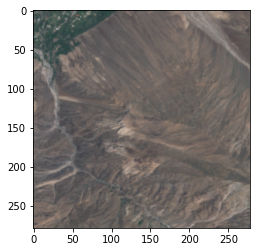

In [ ]:
import rasterio as rio
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from banet.data import open_tif

bands = ['2', '3', '4', '8', '11', '12']
for band in bands:
  id = '6839'
  path = f'/content/content/data/{id}/download.B{band}.tif'
  b_to_write = []
  with rio.open(path,'r') as f:
    b_read = f.read(1)
    #print(b_read)
    for limiter in range(0, b_read.shape[0]//2):
      row = b_read[limiter]
      temp_arr = []
      for second_limiter in range(0,b_read.shape[1]//2):      
        temp_arr.append(row[second_limiter])
      b_to_write.append(temp_arr)

    
  b_to_write = np.array(b_to_write)
  
  with rio.open('downloadB'+band+'.tif','w', width=278, height=279, count=1,dtype=rio.float32) as f:
      f.write(b_to_write,1)
im = np.concatenate([open_tif(f'download{b}.tif').read() for b in ['B4','B3','B2']])
im = im.transpose(1,2,0).astype(np.float32)/10000
plt.imshow(3*im)
print(im.shape)



In [ ]:
datafile = pd.read_csv('/content/FYP_Dataset.csv')
datafile

In [ ]:
!cp "/content/gdrive/MyDrive/FYP_Dataset.csv" "/content"

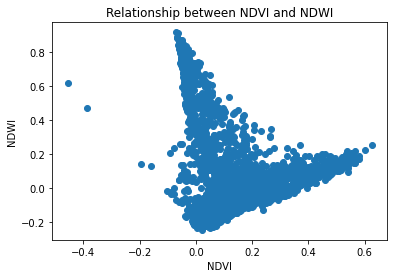

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
ndwi_arr = datafile['mean_ndwi']
plt.scatter(ndvi_arr, ndwi_arr)
plt.title("Relationship between NDVI and NDWI")
plt.xlabel("NDVI")
plt.ylabel("NDWI")
plt.show()

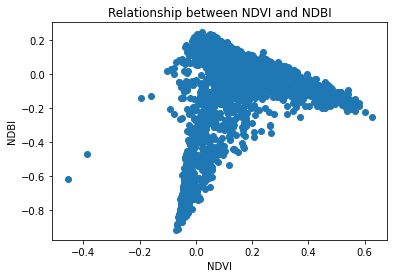

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
ndbi_arr = datafile['mean_ndbi']
plt.scatter(ndvi_arr, ndbi_arr)
plt.title("Relationship between NDVI and NDBI")
plt.xlabel("NDVI")
plt.ylabel("NDBI")
plt.show()

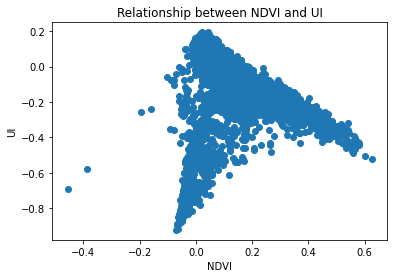

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
ui_arr = datafile['mean_ui']
plt.scatter(ndvi_arr, ui_arr)
plt.title("Relationship between NDVI and UI")
plt.xlabel("NDVI")
plt.ylabel("UI")
plt.show()

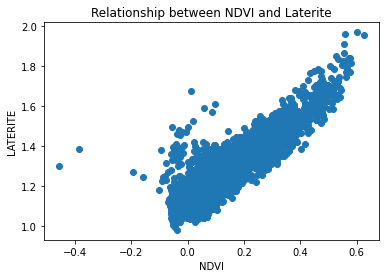

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
lat_arr = datafile['mean_laterite']
plt.scatter(ndvi_arr, lat_arr)
plt.title("Relationship between NDVI and Laterite")
plt.xlabel("NDVI")
plt.ylabel("LATERITE")
plt.show()

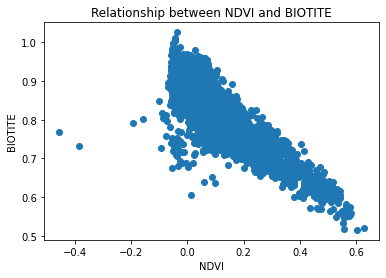

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
bio_arr = datafile['mean_biotite']
plt.scatter(ndvi_arr, bio_arr)
plt.title("Relationship between NDVI and BIOTITE")
plt.xlabel("NDVI")
plt.ylabel("BIOTITE")
plt.show()

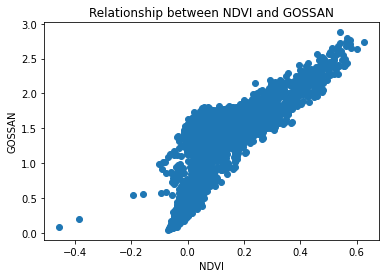

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
goss_arr = datafile['mean_gossan']
plt.scatter(ndvi_arr, goss_arr)
plt.title("Relationship between NDVI and GOSSAN")
plt.xlabel("NDVI")
plt.ylabel("GOSSAN")
plt.show()

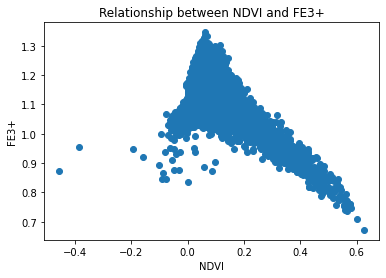

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
fe3_arr = datafile['mean_fe3+']
plt.scatter(ndvi_arr, fe3_arr)
plt.title("Relationship between NDVI and FE3+")
plt.xlabel("NDVI")
plt.ylabel("FE3+")
plt.show()

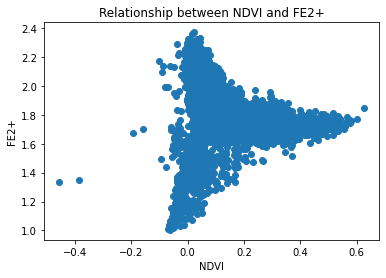

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
fe2_arr = datafile['mean_fe2+']
plt.scatter(ndvi_arr, fe2_arr)
plt.title("Relationship between NDVI and FE2+")
plt.xlabel("NDVI")
plt.ylabel("FE2+")
plt.show()

Text(0, 0.5, 'Frequency')

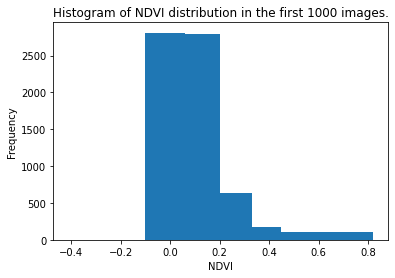

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
plt.hist(ndvi_arr,bins=[-0.41,-0.10,0.06,0.2,0.33,0.45,0.82])
plt.title("Histogram of NDVI distribution in the first 1000 images.")
plt.xlabel("NDVI")
plt.ylabel("Frequency")

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

distortions = []
datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.dropna()
X = datafile[['mean_ndwi', 'mean_ndbi', 'mean_ui', 'mean_laterite', 'mean_biotite', 'mean_fe3+', 'mean_fe2+', 'mean_gossan']]
for K in range(1, 25):
  kmeans = KMeans(n_clusters = K, n_init=15, max_iter=500)
  kmeans.fit(X)
  distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])


In [ ]:
import pandas as pd

data = pd.read_csv('/content/FYP_dataset.csv')
data = data.dropna()
datafile.to_csv('FYP_dataset_without_nulls.csv', index=False)


In [ ]:
kmeans.labels_

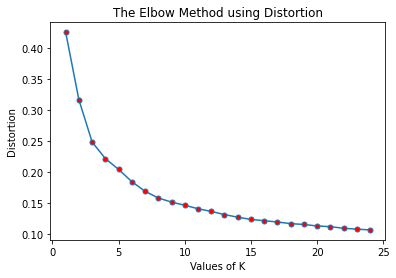

In [ ]:
plt.plot(range(1, 25), distortions, marker = 'o', markerfacecolor='red', markersize = 5)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

distortions = []
datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.dropna()
X = datafile[['mean_ndwi', 'mean_ndbi', 'mean_ui', 'mean_laterite', 'mean_biotite', 'mean_fe3+', 'mean_fe2+', 'mean_gossan']]

kmeans = KMeans(n_clusters = 10, n_init=15, max_iter=500)
kmeans.fit(X)
distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

In [ ]:
import pandas as pd
dataset_file = pd.read_csv('/content/FYP_dataset_without_nulls.csv')
labels = kmeans.labels_
for item in range(0,labels.shape[0]):
  dataset_file.loc[item,'label_assigned'] = str(labels[item])
  print(labels[item])
dataset_file.to_csv('FYP_dataset_without_nulls_with_labels.csv', index=False)


  


In [ ]:
kmeans.cluster_centers_

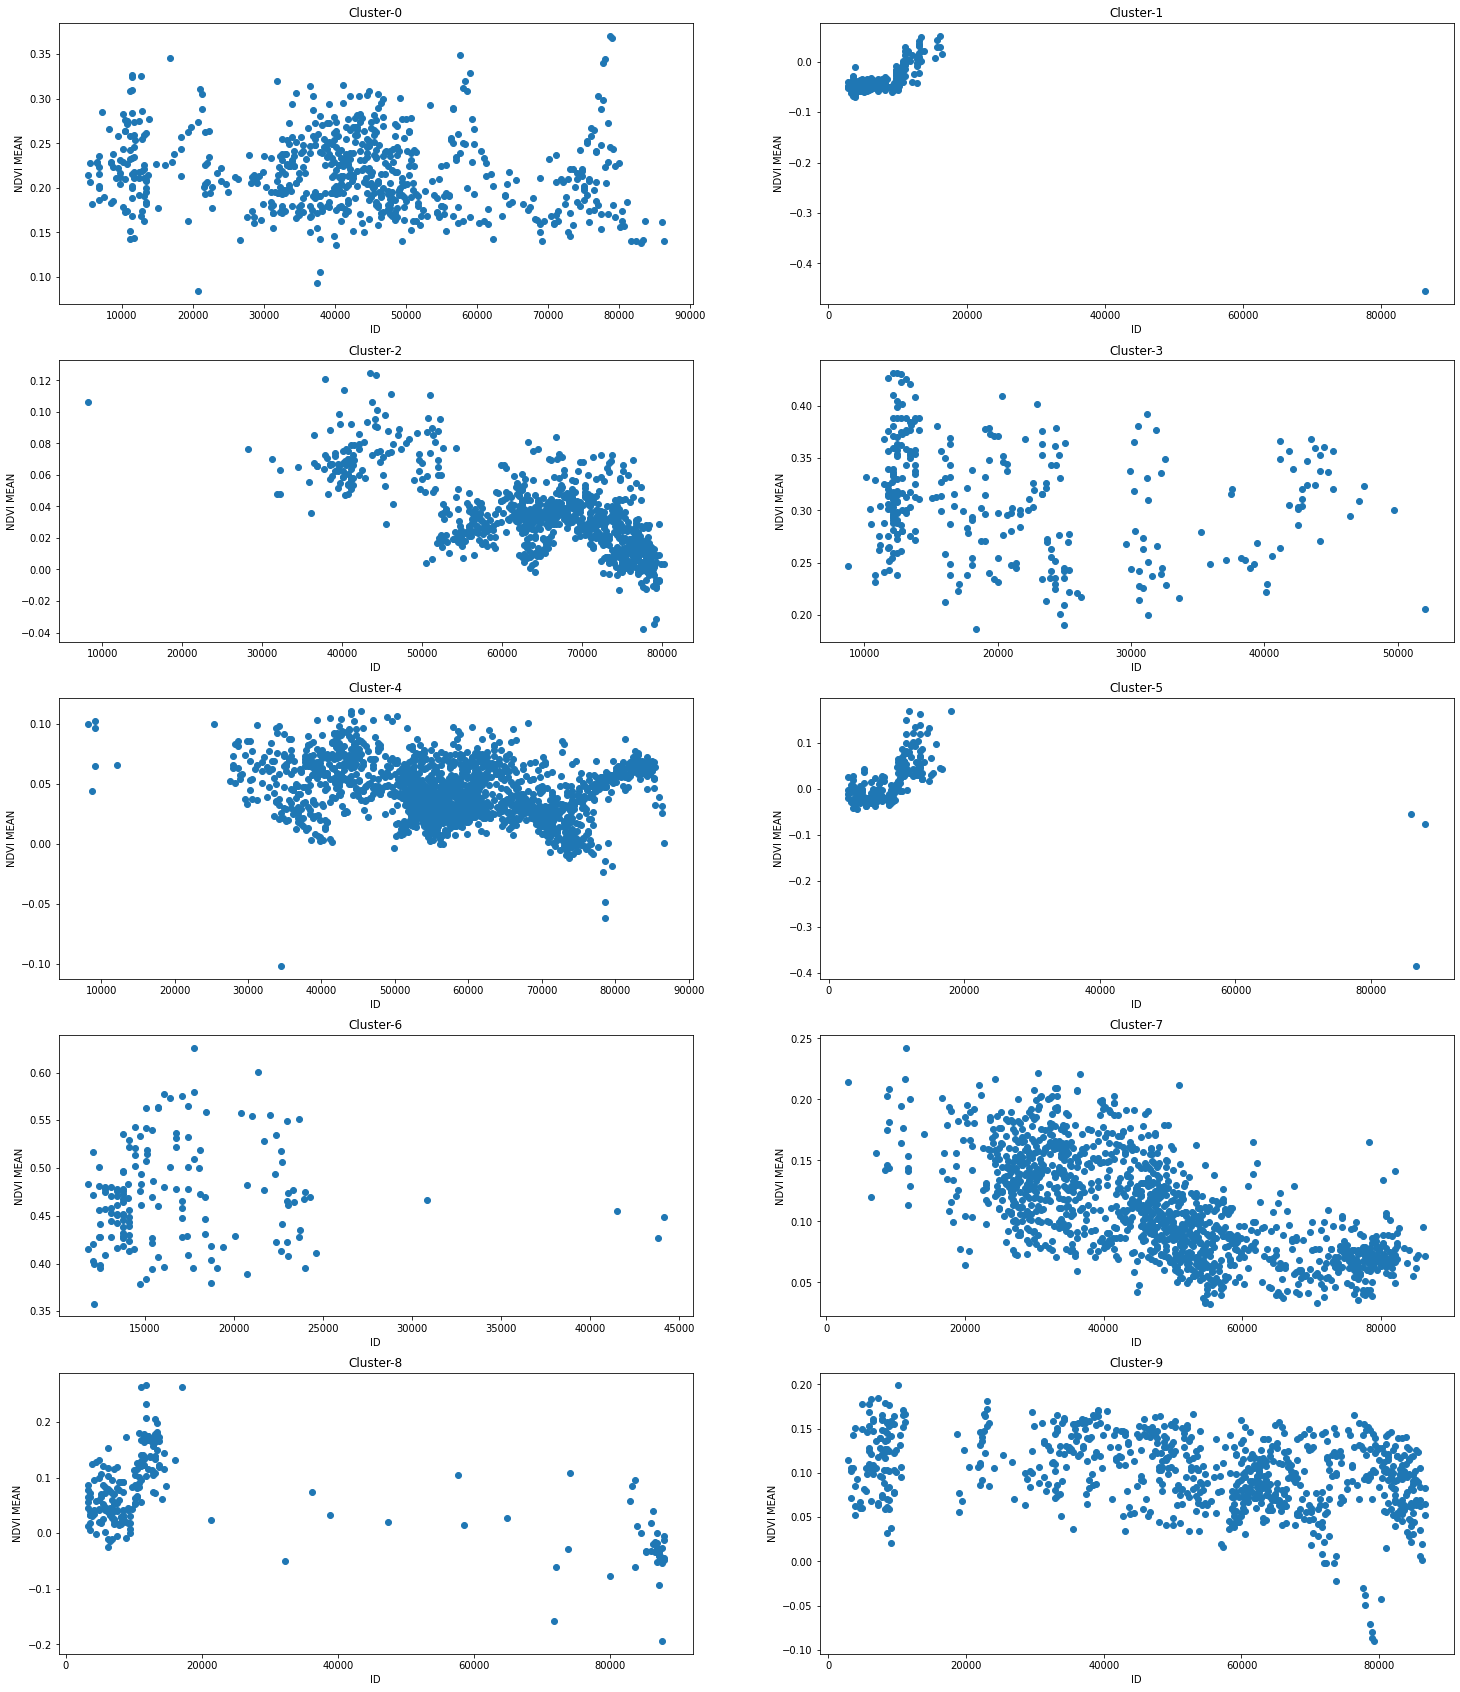

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datafile = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels.csv')
fig = plt.figure(figsize=(25,30))
data = datafile[datafile['label_assigned']==0]
ax1= fig.add_subplot(521)
ax1.set_title("Cluster-0")
ax1.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==1]
ax2= fig.add_subplot(522)
ax2.set_title("Cluster-1")
ax2.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==2]
ax3= fig.add_subplot(523)
ax3.set_title("Cluster-2")
ax3.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==3]
ax4= fig.add_subplot(524)
ax4.set_title("Cluster-3")
ax4.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==4]
ax5= fig.add_subplot(525)
ax5.set_title("Cluster-4")
ax5.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==5]
ax6= fig.add_subplot(526)
ax6.set_title("Cluster-5")
ax6.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==6]
ax7= fig.add_subplot(527)
ax7.set_title("Cluster-6")
ax7.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==7]
ax8= fig.add_subplot(528)
ax8.set_title("Cluster-7")
ax8.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==8]
ax9= fig.add_subplot(529)
ax9.set_title("Cluster-8")
ax9.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==9]
ax10= fig.add_subplot(5,2,10)
ax10.set_title("Cluster-9")
ax10.scatter(data['id'], data['mean_ndvi'])

ax1.set_xlabel('ID')
ax1.set_ylabel('NDVI MEAN')
ax2.set_xlabel('ID')
ax2.set_ylabel('NDVI MEAN')
ax3.set_xlabel('ID')
ax3.set_ylabel('NDVI MEAN')
ax4.set_xlabel('ID')
ax4.set_ylabel('NDVI MEAN')
ax5.set_xlabel('ID')
ax5.set_ylabel('NDVI MEAN')
ax6.set_xlabel('ID')
ax6.set_ylabel('NDVI MEAN')
ax7.set_xlabel('ID')
ax7.set_ylabel('NDVI MEAN')
ax8.set_xlabel('ID')
ax8.set_ylabel('NDVI MEAN')
ax9.set_xlabel('ID')
ax9.set_ylabel('NDVI MEAN')
ax10.set_xlabel('ID')
ax10.set_ylabel('NDVI MEAN')


plt.show()




In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

distortions = []
datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.dropna()
X = datafile[['mean_ndwi', 'mean_ui', 'mean_laterite', 'mean_biotite', 'mean_gossan']]
for K in range(1, 25):
  kmeans = KMeans(n_clusters = K, n_init=15, max_iter=500)
  kmeans.fit(X)
  distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

In [ ]:
import pandas as pd

data = pd.read_csv('/content/FYP_dataset.csv')
data = data.dropna()
datafile.to_csv('FYP_dataset_without_nulls-2.csv', index=False)

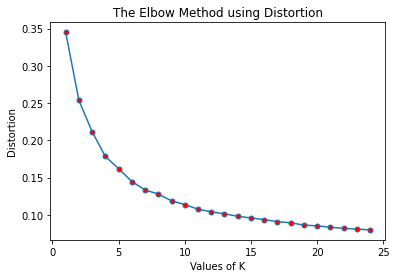

In [ ]:
plt.plot(range(1, 25), distortions, marker = 'o', markerfacecolor='red', markersize = 5)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

distortions = []
datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.dropna()
X = datafile[['mean_ndwi', 'mean_ui', 'mean_laterite', 'mean_biotite', 'mean_gossan']]

kmeans = KMeans(n_clusters = 6, n_init=15, max_iter=500)
kmeans.fit(X)
distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])

In [ ]:
import pandas as pd
dataset_file = pd.read_csv('/content/FYP_dataset_without_nulls-2.csv')
labels = kmeans.labels_
for item in range(0,labels.shape[0]):
  dataset_file.loc[item,'label_assigned'] = str(labels[item])
 # print(labels[item])
dataset_file.to_csv('FYP_dataset_without_nulls_with_labels-2.csv', index=False)

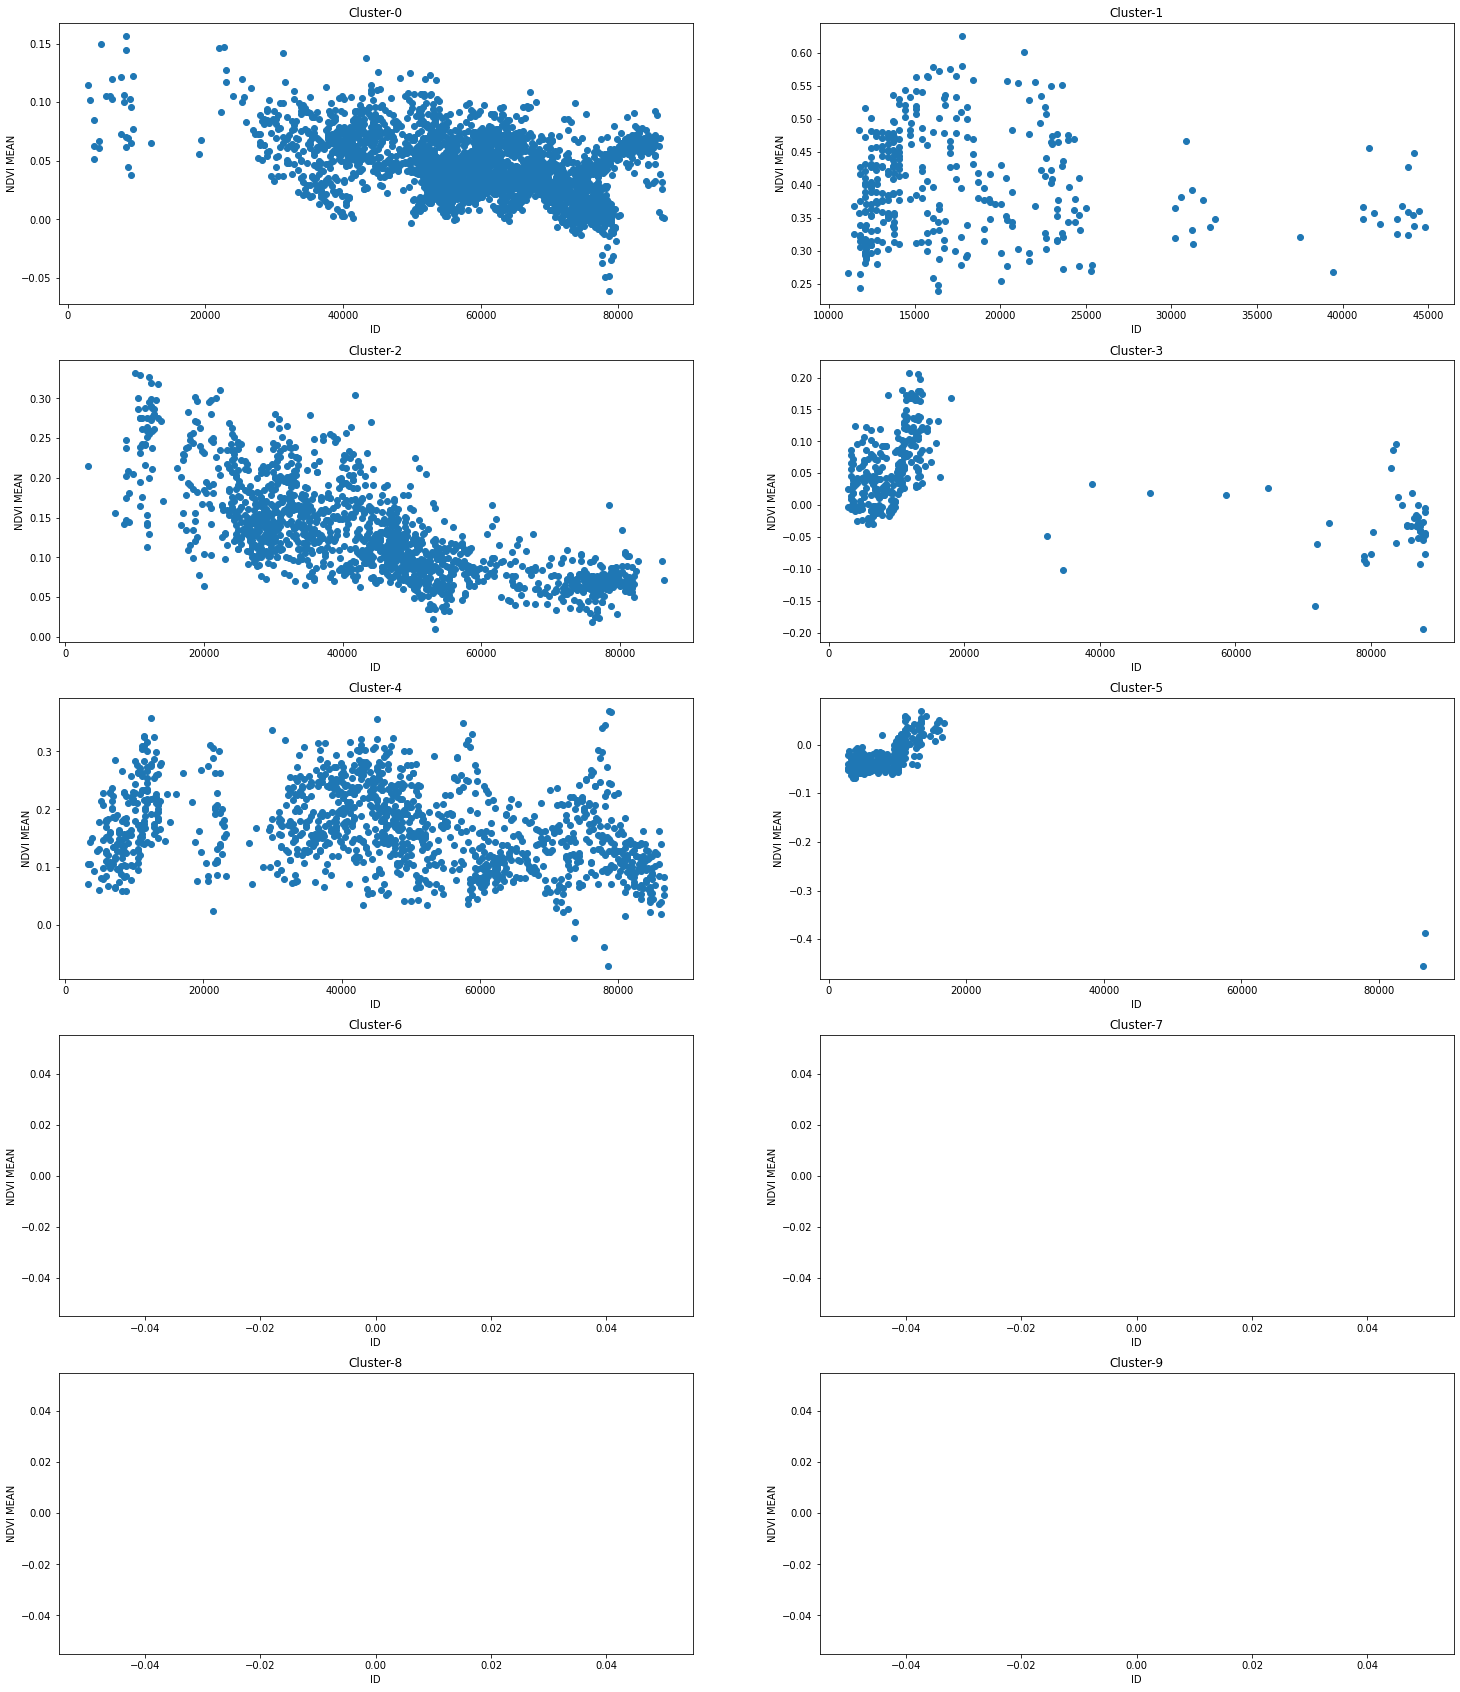

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datafile = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels-2.csv')
fig = plt.figure(figsize=(25,30))
data = datafile[datafile['label_assigned']==0]
ax1= fig.add_subplot(521)
ax1.set_title("Cluster-0")
ax1.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==1]
ax2= fig.add_subplot(522)
ax2.set_title("Cluster-1")
ax2.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==2]
ax3= fig.add_subplot(523)
ax3.set_title("Cluster-2")
ax3.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==3]
ax4= fig.add_subplot(524)
ax4.set_title("Cluster-3")
ax4.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==4]
ax5= fig.add_subplot(525)
ax5.set_title("Cluster-4")
ax5.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==5]
ax6= fig.add_subplot(526)
ax6.set_title("Cluster-5")
ax6.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==6]
ax7= fig.add_subplot(527)
ax7.set_title("Cluster-6")
ax7.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==7]
ax8= fig.add_subplot(528)
ax8.set_title("Cluster-7")
ax8.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==8]
ax9= fig.add_subplot(529)
ax9.set_title("Cluster-8")
ax9.scatter(data['id'], data['mean_ndvi'])
data = datafile[datafile['label_assigned']==9]
ax10= fig.add_subplot(5,2,10)
ax10.set_title("Cluster-9")
ax10.scatter(data['id'], data['mean_ndvi'])

ax1.set_xlabel('ID')
ax1.set_ylabel('NDVI MEAN')
ax2.set_xlabel('ID')
ax2.set_ylabel('NDVI MEAN')
ax3.set_xlabel('ID')
ax3.set_ylabel('NDVI MEAN')
ax4.set_xlabel('ID')
ax4.set_ylabel('NDVI MEAN')
ax5.set_xlabel('ID')
ax5.set_ylabel('NDVI MEAN')
ax6.set_xlabel('ID')
ax6.set_ylabel('NDVI MEAN')
ax7.set_xlabel('ID')
ax7.set_ylabel('NDVI MEAN')
ax8.set_xlabel('ID')
ax8.set_ylabel('NDVI MEAN')
ax9.set_xlabel('ID')
ax9.set_ylabel('NDVI MEAN')
ax10.set_xlabel('ID')
ax10.set_ylabel('NDVI MEAN')


plt.show()


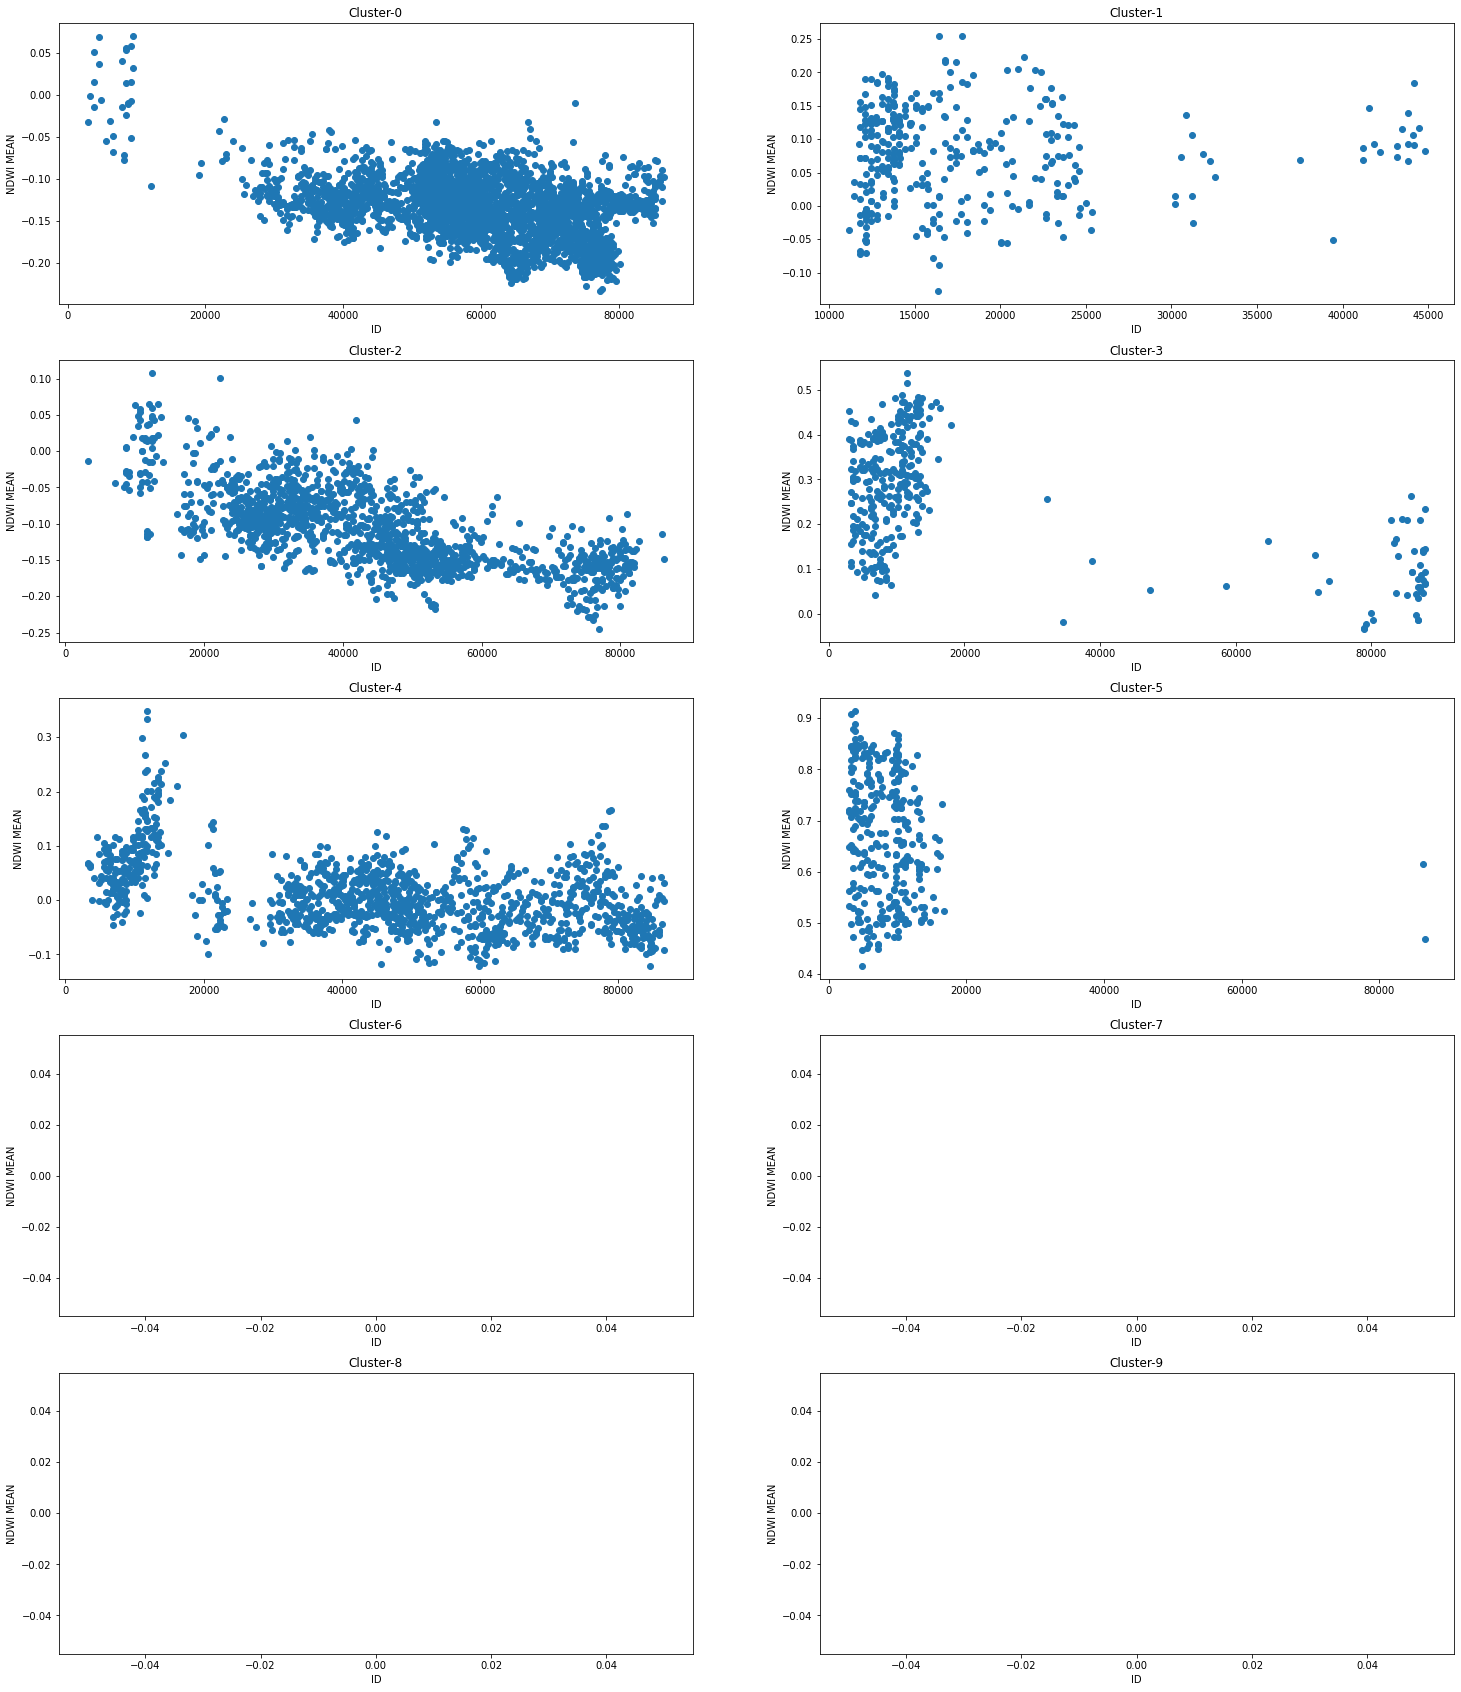

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datafile = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels for 6 clusters.csv')
fig = plt.figure(figsize=(25,30))
data = datafile[datafile['label_assigned']==0]
ax1= fig.add_subplot(521)
ax1.set_title("Cluster-0")
ax1.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==1]
ax2= fig.add_subplot(522)
ax2.set_title("Cluster-1")
ax2.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==2]
ax3= fig.add_subplot(523)
ax3.set_title("Cluster-2")
ax3.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==3]
ax4= fig.add_subplot(524)
ax4.set_title("Cluster-3")
ax4.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==4]
ax5= fig.add_subplot(525)
ax5.set_title("Cluster-4")
ax5.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==5]
ax6= fig.add_subplot(526)
ax6.set_title("Cluster-5")
ax6.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==6]
ax7= fig.add_subplot(527)
ax7.set_title("Cluster-6")
ax7.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==7]
ax8= fig.add_subplot(528)
ax8.set_title("Cluster-7")
ax8.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==8]
ax9= fig.add_subplot(529)
ax9.set_title("Cluster-8")
ax9.scatter(data['id'], data['mean_ndwi'])
data = datafile[datafile['label_assigned']==9]
ax10= fig.add_subplot(5,2,10)
ax10.set_title("Cluster-9")
ax10.scatter(data['id'], data['mean_ndwi'])

ax1.set_xlabel('ID')
ax1.set_ylabel('NDWI MEAN')
ax2.set_xlabel('ID')
ax2.set_ylabel('NDWI MEAN')
ax3.set_xlabel('ID')
ax3.set_ylabel('NDWI MEAN')
ax4.set_xlabel('ID')
ax4.set_ylabel('NDWI MEAN')
ax5.set_xlabel('ID')
ax5.set_ylabel('NDWI MEAN')
ax6.set_xlabel('ID')
ax6.set_ylabel('NDWI MEAN')
ax7.set_xlabel('ID')
ax7.set_ylabel('NDWI MEAN')
ax8.set_xlabel('ID')
ax8.set_ylabel('NDWI MEAN')
ax9.set_xlabel('ID')
ax9.set_ylabel('NDWI MEAN')
ax10.set_xlabel('ID')
ax10.set_ylabel('NDWI MEAN')


plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels for 6 clusters.csv')
df = df[df['label_assigned']==3]
df = df[df['mean_ndwi']>0]
df


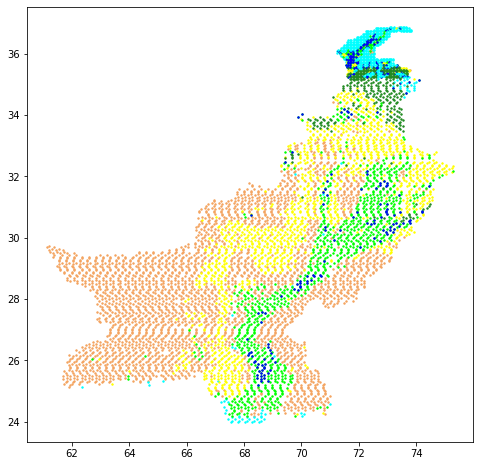

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
dataset = pd.read_csv('/content/FYP_dataset_without_nulls_with_labels for 6 clusters.csv')
dataset_0 = dataset[dataset['label_assigned']==0]
#dataset_0 = dataset_0[dataset_0['mean_ndvi']>0.15]
#dataset_0 = dataset_0[dataset_0['stddev_ndvi']<0.2]
plt.scatter(dataset_0['mean_x'], dataset_0['mean_y'], c = 'sandybrown',s=2)

dataset_3 = dataset[dataset['label_assigned']==3]
#dataset_3 = dataset_3[dataset_3['mean_ndvi']>0.15]
#dataset_3 = dataset_3[dataset_3['stddev_ndvi']<0.2]
plt.scatter(dataset_3['mean_x'], dataset_3['mean_y'], c = 'aqua',s=2)

dataset_2 = dataset[dataset['label_assigned']==2]
#dataset_2 = dataset_2[dataset_2['mean_ndvi']>0.15]
#dataset_2 = dataset_2[dataset_2['stddev_ndvi']<0.2]
plt.scatter(dataset_2['mean_x'], dataset_2['mean_y'], c = 'yellow',s=2)

dataset_4 = dataset[dataset['label_assigned']==4]
#dataset_4 = dataset_4[dataset_4['mean_ndwi']>0.2]
#dataset_4 = dataset_4[dataset_4['stddev_ndvi']<0.2]
plt.scatter(dataset_4['mean_x'], dataset_4['mean_y'], c = 'lime',s=2)

dataset_45 = dataset[dataset['label_assigned']==4]
dataset_45 = dataset_45[dataset_45['mean_ndwi']>0.05]
#dataset_45 = dataset_4[dataset_4['stddev_ndvi']<0.2]
plt.scatter(dataset_45['mean_x'], dataset_45['mean_y'], c = 'blue',s=2)


dataset_1 = dataset[dataset['label_assigned']==1]
#dataset_1 = dataset_1[dataset_1['mean_ndvi']>0.15]
#dataset_1 = dataset_1[dataset_1['stddev_ndvi']<0.2]
plt.scatter(dataset_1['mean_x'], dataset_1['mean_y'], c = 'forestgreen',s=2)

dataset_5 = dataset[dataset['label_assigned']==5]
#dataset_3 = dataset_3[dataset_3['mean_ndvi']>0.15]
#dataset_3 = dataset_3[dataset_3['stddev_ndvi']<0.2]
plt.scatter(dataset_5['mean_x'], dataset_5['mean_y'], c ='aqua',s=2)



plt.show()


(558, 558, 3)

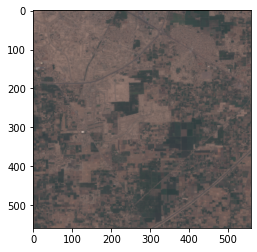

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from banet.data import open_tif
#import tensorflow as tf
#import cv2


brightness = 2
im = np.concatenate([open_tif(f'/content/data/content/content/data/47408/download.{b}.tif').read() for b in ['B4', 'B3', 'B2']])
im = im.transpose(1,2,0).astype(np.float32)/10000
plt.imshow(brightness*im)
im.shape

In [ ]:
#incase we need to find the slope
print(np.argwhere(dem_raster==dem_raster.min()))
print(np.argwhere(dem_raster==dem_raster.max()))
datafile.loc[count,'derrivative_elevation'] = str(((dem_raster.max()-dem_raster.min())/np.linalg.norm(np.argwhere(dem_raster==dem_raster.min())[0]-np.argwhere(dem_raster==dem_raster.max())[0]))/dem_raster.shape[0])



In [1]:
import ee

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=jwZh_ec8GA9E3qwTZEWd_610q0nws_kRNk8NP6eV_8g&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgU-vqXdCpX2OtyVAXjtZEv5eFXC7xOOgCuJ7S1vpX4EZj37gU0Wf0

Successfully saved authorization token.


In [ ]:
#ELEVATION
import pandas as pd

elv = ee.Image('USGS/SRTMGL1_003')

i_date = '2021-06-01'
f_date = '2021-07-25'

count = 0
datafile = pd.read_csv("/content/FYP_dataset.csv")

for index,row in datafile.iterrows():
  
  if (count%5!=0):
    count+=1
    continue

  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left + 0.05
  bottom = top - 0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(count,id)
  mean_elv = elv.reduceRegion(
    ee.Reducer.mean(), chunk).get('elevation').getInfo()
  print('Average elevation :', mean_elv , 'm')
  std_elv = elv.reduceRegion(
    ee.Reducer.stdDev(), chunk).get('elevation').getInfo()
  print('Standard deviation of elevation:', std_elv , 'm')
  
  datafile.loc[count,'mean_elv'] = mean_elv
  datafile.loc[count,'std_elv'] = std_elv
  count+=1
  print(id, " done")
 
datafile.to_csv('FYP_dataset.csv', index=False)

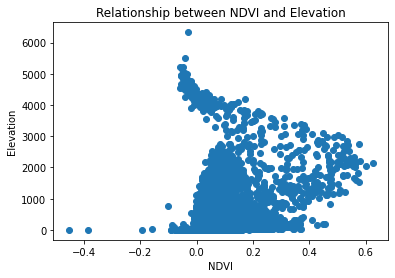

In [ ]:
#relationship between elevation and ndvi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
elv_arr = datafile['mean_elv']
plt.scatter(ndvi_arr, elv_arr)
plt.title("Relationship between NDVI and Elevation")
plt.xlabel("NDVI")
plt.ylabel("Elevation")
plt.show()

In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#janruary
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,1,1)
    f_date = date(2020,2,1)
    total_jan = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_jan += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_jan = round(total_jan / 1,2)
    else:      
      average_jan = round(total_jan / count,2)
    print("Average Janruary temperature is:",average_jan,"°C")

    datafile.loc[counter,'average_jan'] = average_jan
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#february
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,2,1)
    f_date = date(2020,3,1)
    total_feb = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_feb += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_feb = round(total_feb / 1,2)
    else:      
      average_feb = round(total_feb / count,2)
    print("Average February temperature is:",average_feb,"°C")

    datafile.loc[counter,'average_feb'] = average_feb
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


Streaming output truncated to the last 5000 lines.
mean_lst is of none type
mean_lst is of none type
Average February temperature is: 24.95 °C
29269  done
1569 29274
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
Average February temperature is: 23.68 °C
29274  done
1570 29279
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
Average February temperature is: 22.83 °C
29279  done
1571 29284
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
mean_lst is of none type
Average February temperature is: 19.46 °C
29284  done
1572 29289
mean_lst is of none type
mean_lst is of

In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#march
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,3,1)
    f_date = date(2020,4,1)
    total_march = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_march += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_march = round(total_march / 1,2)
    else:      
      average_march = round(total_march / count,2)
    print("Average March temperature is:",average_march,"°C")

    datafile.loc[counter,'average_march'] = average_march
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#April
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,4,1)
    f_date = date(2020,5,1)
    total_april = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_april += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_april = round(total_april / 1,2)
    else:      
      average_april = round(total_april / count,2)
    print("Average april temperature is:",average_april,"°C")

    datafile.loc[counter,'average_april'] = average_april
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#May
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,5,1)
    f_date = date(2020,6,1)
    total_may = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_may += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_may = round(total_may / 1,2)
    else:      
      average_may = round(total_may / count,2)
    print("Average May temperature is:",average_may,"°C")

    datafile.loc[counter,'average_may'] = average_may
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#june
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,6,1)
    f_date = date(2020,7,1)
    total_june = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_june += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_june = round(total_june / 1,2)
    else:      
      average_june = round(total_june / count,2)
    print("Average june temperature is:",average_june,"°C")

    datafile.loc[counter,'average_june'] = average_june
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#july
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,7,1)
    f_date = date(2020,8,1)
    total_july = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_july += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_july = round(total_july / 1,2)
    else:      
      average_july = round(total_july / count,2)
    print("Average july temperature is:",average_july,"°C")

    datafile.loc[counter,'average_july'] = average_july
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#august
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,8,1)
    f_date = date(2020,9,1)
    total_aug = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_aug += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_aug = round(total_aug / 1,2)
    else:      
      average_aug = round(total_aug / count,2)
    print("Average august temperature is:",average_aug,"°C")

    datafile.loc[counter,'average_aug'] = average_aug
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#september
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,9,1)
    f_date = date(2020,10,1)
    total_sep = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_sep += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_sep = round(total_sep / 1,2)
    else:      
      average_sep = round(total_sep / count,2)
    print("Average September temperature is:",average_sep,"°C")

    datafile.loc[counter,'average_sep'] = average_sep
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#October
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,10,1)
    f_date = date(2020,11,1)
    total_oct = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_oct += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_oct = round(total_oct / 1,2)
    else:      
      average_oct = round(total_oct / count,2)
    print("Average October temperature is:",average_oct,"°C")

    datafile.loc[counter,'average_oct'] = average_oct
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#november
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,11,1)
    f_date = date(2020,12,1)
    total_nov = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_nov += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
     average_nov = round(total_nov / 1,2)
    else:      
     average_nov = round(total_nov / count,2)
    print("Average november temperature is:",average_nov,"°C")

    datafile.loc[counter,'average_nov'] = average_nov
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [ ]:
# LAND SURFACE TEMPERATURE (DAYTIME)
#december
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
lst = ee.ImageCollection('MODIS/006/MOD11A1')

counter = 0
start = 1000
for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==2000):
    break

  else:  
    id = str(int(row['id']))
    left   = float(row['left'])
    top   = float(row['top'])
    right  = left + 0.05
    bottom = top - 0.05
    chunk = ee.Geometry.Rectangle(left,bottom,right,top)
    print(counter,id)

    def daterange(i_date, f_date):
        for n in range(int ((f_date - i_date).days)):
            yield i_date + timedelta(n)

    i_date = date(2020,12,1)
    f_date = date(2020,12,31)
    total_dec = 0
    count = 0
    for single_date in daterange(i_date, f_date):
        in_date = single_date.strftime("%Y-%m-%d")
        fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
        lst = lst.select('LST_Day_1km', 'QC_Day').filterDate(in_date, fi_date)
        lst = ee.Image(lst.sort('CLOUD COVER').first())
        mean_lst = lst.reduceRegion(
          ee.Reducer.mean(), chunk).get('LST_Day_1km').getInfo()
        if (mean_lst is None):
          print("mean_lst is of none type")
        else : 
          temp = round(mean_lst*0.02 -273.15, 2) 
          count += 1
          total_dec += temp
        lst = ee.ImageCollection('MODIS/006/MOD11A1')
    if (count == 0):
      average_dec = round(total_dec / 1,2)
    else:      
      average_dec = round(total_dec / count,2)
    print("Average december temperature is:",average_dec,"°C")

    datafile.loc[counter,'average_dec'] = average_dec
    counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 


In [7]:
#LAND SURFACE TEMPERATURE (DAYTIME)
#annual
import pandas as pd

datafile = pd.read_csv("FYP_dataset.csv")

average_annual = ((datafile["average_jan"]+datafile["average_feb"]+datafile["average_march"]+datafile["average_april"]+datafile["average_may"]+datafile["average_june"]+datafile["average_july"]+datafile["average_aug"]+datafile["average_sep"]+datafile["average_oct"]+datafile["average_nov"]+datafile["average_dec"])/12)
average_annual = round(average_annual,2)
datafile["annual_temp"] = average_annual

datafile.to_csv('FYP_dataset.csv', index=False)
datafile.head(5) 

,id,left,top,mean_x,mean_y,mean_ndvi,stddev_ndvi,ndvi_water,ndvi_sand,ndvi_wasteland,ndvi_grass,ndvi_argoforests,ndvi_forest,mean_ndwi,stddev_ndwi,mean_ndbi,stddev_ndbi,mean_ui,stddev_ui,mean_laterite,stddev_laterite,mean_biotite,stddev_biotite,mean_fe3+,stddev_fe3+,mean_gossan,stddev_gossan,mean_fe2+,stddev_fe2+,mean_elv,std_elv,average_jan,average_feb,average_march,average_april,average_may,average_june,average_july,average_aug,average_sep,average_oct,average_nov,average_dec,annual_temp
0,2890.0,73.11,36.91,73.085,36.885,-0.039694,0.027737,416.0,309352.0,1573.0,23.0,0.0,0.0,0.648128,0.293567,-0.648128,0.293567,-0.684599,0.264488,1.155860,0.076422,0.868981,0.058202,1.058462,0.043685,0.249872,0.264197,1.167988,0.224396,4717.384828,256.713758,-20.34,-13.97,-8.03,-1.18,2.88,8.97,15.08,21.83,13.22,-2.67,-8.71,-18.69,-0.97
1,2898.0,73.51,36.91,73.485,36.885,-0.048020,0.031489,1240.0,308013.0,2111.0,0.0,0.0,0.0,0.717045,0.284426,-0.717045,0.284426,-0.744375,0.261865,1.146826,0.067067,0.874891,0.050016,1.059223,0.051650,0.202429,0.275237,1.126779,0.210014,4889.703899,201.580700,-20.89,-16.97,-9.94,-2.51,2.21,7.79,13.96,20.50,8.53,-1.11,-11.28,-20.21,-2.49
2,3211.0,72.66,36.86,72.635,36.835,-0.052880,0.020105,1145.0,309581.0,80.0,0.0,0.0,0.0,0.818932,0.223012,-0.818932,0.223012,-0.834826,0.210264,1.149537,0.087369,0.874842,0.065680,1.055851,0.033676,0.115974,0.197265,1.058383,0.179654,4918.753906,312.541231,-23.98,-17.11,-12.01,-5.23,-0.80,2.93,5.35,8.84,4.45,-8.87,-13.93,-21.76,-6.84
3,3216.0,72.91,36.86,72.885,36.835,-0.043729,0.030588,1388.0,307415.0,2003.0,0.0,0.0,0.0,0.650992,0.311082,-0.650992,0.311082,-0.686398,0.283490,1.154379,0.072321,0.869649,0.054107,1.055166,0.046012,0.255634,0.292826,1.176509,0.249740,4856.122469,411.452584,-21.37,-13.56,-8.30,-1.94,1.72,6.77,11.11,13.72,7.79,-4.54,-8.14,-18.57,-2.94
4,3221.0,73.16,36.86,73.135,36.835,0.013562,0.077016,727.0,220692.0,83848.0,3605.0,1041.0,336.0,0.246314,0.446737,-0.246314,0.446737,-0.308582,0.415749,1.179439,0.088863,0.852738,0.065421,1.070662,0.060136,0.905648,0.684533,1.617989,0.480380,4339.410808,686.615333,-17.39,-11.66,-5.07,6.45,11.71,17.94,21.68,25.38,18.07,6.87,-0.93,-16.38,4.72


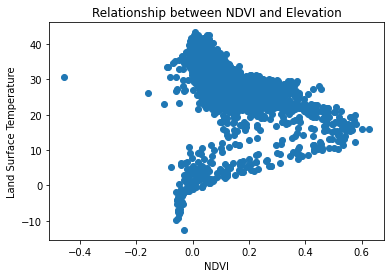

In [8]:
#Relationship between Temperature(LST) and NDVI
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

datafile = pd.read_csv('FYP_dataset.csv')
datafile = datafile.sort_values('mean_ndvi')
ndvi_arr = datafile['mean_ndvi']
temp_arr = datafile['annual_temp']
plt.scatter(ndvi_arr, temp_arr)
plt.title("Relationship between NDVI and Elevation")
plt.xlabel("NDVI")
plt.ylabel("Land Surface Temperature")
plt.show()

In [2]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=saREAQ1zzDbvjoUMr0J5bHb2jVMyzBDJ0jBJnVIv1y0&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWhe3jdfS3Z9pr7ebtZyipb9bNnnkUUxPmpcebfIYvMpZBsssU1Iam8

Successfully saved authorization token.


In [3]:
#RAINFALL
#january

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000): #do 1000 k batches
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,1,1)
  f_date = date(2019,2,1)
  total_jan = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_jan += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_jan = total_jan / 1
  else:
    average_jan = total_jan / count

  print("Average January rainfall is:",average_jan)

  datafile.loc[counter,'average_jan_rain'] = average_jan
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average January rainfall is: 0.0012478479334423619
1 2898


KeyboardInterrupt: ignored

In [4]:
#february

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,2,1)
  f_date = date(2019,3,1)
  total_feb = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()
      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = round(mean_pr, 2) 
        count += 1
        total_feb += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_feb = round(total_feb / 1,2)
  else:
    average_feb = round(total_feb / count,2)

  print("Average February rainfall is:",average_feb)

  datafile.loc[counter,'average_feb_rain'] = average_feb
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average February rainfall is: 0.0
1 2898


KeyboardInterrupt: ignored

In [5]:
#march

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,3,1)
  f_date = date(2019,4,1)
  total_march = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_march += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_march = total_march / 1
  else:
    average_march = total_march / count

  print("Average March rainfall is:",average_march)

  datafile.loc[counter,'average_march_rain'] = average_march
  counter+=1

datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average March rainfall is: 0.0
1 2898
Average March rainfall is: 0.0
2 3211


KeyboardInterrupt: ignored

In [6]:
#april

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,4,1)
  f_date = date(2019,5,1)
  total_april = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_april += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_april = total_april / 1
  else:
    average_april = total_april / count

  print("Average April rainfall is:",average_april)

  datafile.loc[counter,'average_april_rain'] = average_april
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average April rainfall is: 0.0019467851147055627
1 2898


KeyboardInterrupt: ignored

In [7]:
#may

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 3000

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==4000): 
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,5,1)
  f_date = date(2019,6,1)
  total_may = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_may += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_may = total_may / 1
  else:
    average_may = total_may / count

  print("Average May rainfall is:",average_may)

  datafile.loc[counter,'average_may_rain'] = average_may
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

3000 2890
Average May rainfall is: 0.0010163517849099252
3001 2898


KeyboardInterrupt: ignored

In [8]:
#june

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 2000

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==3000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,6,1)
  f_date = date(2019,7,1)
  total_june = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_june += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_june = total_june / 1
  else:
    average_june = total_june / count

  print("Average June rainfall is:",average_june)

  datafile.loc[counter,'average_june_rain'] = average_june
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

2000 2890
Average June rainfall is: 0.0008156342121462027
2001 2898
Average June rainfall is: 0.0006239853178461392
2002 3211
Average June rainfall is: 0.0005800540869434675
2003 3216


KeyboardInterrupt: ignored

In [12]:
#july

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 2000

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==3000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,7,1)
  f_date = date(2019,8,1)
  total_july = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_july += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_july = total_july / 1
  else:
    average_july = total_july / count

  print("Average July rainfall is:",average_july)

  datafile.loc[counter,'average_july_rain'] = average_july
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

2000 2890
Average July rainfall is: 0.0010032398445952322
2001 2898


KeyboardInterrupt: ignored

In [13]:
#august

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 300

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==4000): 
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,8,1)
  f_date = date(2019,9,1)
  total_august = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_august += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_august = total_august / 1
  else:
    average_august = total_august / count

  print("Average August rainfall is:",average_august)

  datafile.loc[counter,'average_august_rain'] = average_august
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

300 2890
Average August rainfall is: 0.001304537658729861
301 2898


KeyboardInterrupt: ignored

In [15]:
#september

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,9,1)
  f_date = date(2019,10,1)
  total_sep = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_sep += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_sep = total_sep / 1
  else:
    average_sep = total_sep / count

  print("Average September rainfall is:",average_sep)

  datafile.loc[counter,'average_sep_rain'] = average_sep
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average September rainfall is: 1.1568268140157064e-05
1 2898


KeyboardInterrupt: ignored

In [16]:
#october

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,10,1)
  f_date = date(2019,11,1)
  total_oct = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_oct += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_oct = total_oct / 1
  else:
    average_oct = total_oct / count

  print("Average October rainfall is:",average_oct)

  datafile.loc[counter,'average_oct_rain'] = average_oct
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average October rainfall is: 0.0009304282045172106
1 2898


KeyboardInterrupt: ignored

In [18]:
#november
import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,11,1)
  f_date = date(2019,12,1)
  total_nov = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_nov += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_nov = total_nov / 1
  else:
    average_nov = total_nov / count

  print("Average November rainfall is:",average_nov)

  datafile.loc[counter,'average_nov_rain'] = average_nov
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average November rainfall is: 0.0017757125198841095
1 2898


KeyboardInterrupt: ignored

In [19]:
#december

import pandas as pd
from datetime import timedelta, date

datafile = pd.read_csv("/content/FYP_dataset.csv")
pr = ee.ImageCollection('ECMWF/ERA5/DAILY')

start = 0
counter = 0

for index,row in datafile.iterrows():
  if (counter < start):
    counter+=1
    continue 
    
  if (counter==1000):
    break
  
  id = str(int(row['id']))
  left   = float(row['left'])
  top   = float(row['top'])
  right  = left+0.05
  bottom = top-0.05
  chunk = ee.Geometry.Rectangle(left,bottom,right,top)
  print(counter,id)

  def daterange(i_date, f_date):
      for n in range(int ((f_date - i_date).days)):
          yield i_date + timedelta(n)

  i_date = date(2019,12,1)
  f_date = date(2019,12,31)
  total_dec = 0
  count = 0
  for single_date in daterange(i_date, f_date):
      in_date = single_date.strftime("%Y-%m-%d")
      fi_date = (single_date + timedelta(days=1)).strftime("%Y-%m-%d")
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
      pr = pr.select('total_precipitation').filterDate(in_date, fi_date)
      pr = ee.Image(pr.sort('CLOUD COVER').first())
      mean_pr = pr.reduceRegion(
              ee.Reducer.mean(), chunk).get('total_precipitation').getInfo()

      
      if (mean_pr is None):
        print("mean_pr is of none type")
      else : 
        rain = mean_pr
        count += 1
        total_dec += rain
      pr = ee.ImageCollection('ECMWF/ERA5/DAILY')
  if (count ==0):
    average_dec = total_dec / 1
  else:
    average_dec = total_dec / count

  print("Average December rainfall is:",average_dec)

  datafile.loc[counter,'average_dec_rain'] = average_dec
  counter+=1
 
datafile.to_csv('FYP_dataset.csv', index=False) 

!cp "FYP_dataset.csv" "/content/gdrive/MyDrive"

0 2890
Average December rainfall is: 0.0003484915321071943
1 2898


KeyboardInterrupt: ignored

In [ ]:
#PRECIPITATION
#annual
import pandas as pd

datafile = pd.read_csv("FYP_dataset.csv")

average_annual = ((datafile["average_jan_rain"]+datafile["average_feb_rain"]+datafile["average_march_rain"]+datafile["average_april_rain"]+datafile["average_may_rain"]+datafile["average_june_rain"]+datafile["average_july_rain"]+datafile["average_august_rain"]+datafile["average_sep_rain"]+datafile["average_oct_rain"]+datafile["average_nov_rain"]+datafile["average_dec_rain"]+)/12)
datafile["average_annual_rainfall"] = average_annual

datafile.to_csv('FYP_dataset.csv', index=False) 